In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
from utils import *
plt.style.use('ggplot')

In [16]:
mf = np.load("./result/mf.npy")[range(50)]
policy = np.load("./result/policy.npy")[range(50)]
assert len(mf)==len(policy)
print("The total iteration is ", len(policy))

The total iteration is  50


In [17]:
logger = setup_logger("example_logger", log_file="example.log", level=logging.DEBUG)
r = [2,2]
K = len(r)
mu = np.array([[0.75,0.25],[0.8,0.2]])
pi1 = np.array([[0.5,0.5],[0.5,0.5]])
pi2 = np.array([[0.5,0.5],[0.5,0.5]])
pi = np.array([pi1,pi2])
W = np.eye(K)*0.2 + np.ones((K,K))*0.6
scale = [-0.2,0.2]
obj = GMFG_exact(W,mu,r,pi,K,scale)

In [12]:
res = []
for i in range(len(mf)-1):
    obj.mean_field = mf[i]
    obj.pi = policy[i]
    res.append(evaluate(obj))

In [18]:
res_1  = []
for i in range(len(mf)-1):
    obj.mean_field = mf[i]
    obj.pi = policy[i+1]
    res_1.append(evaluate(obj))

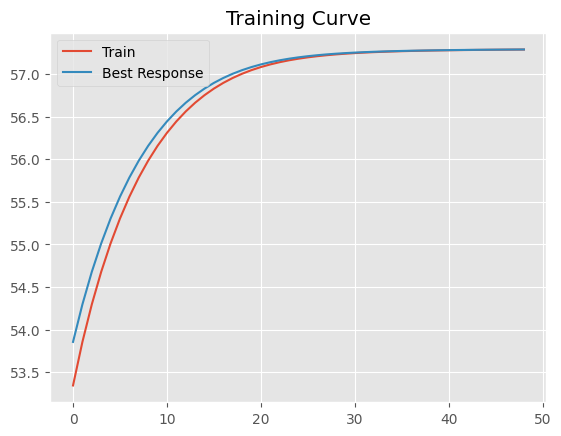

In [22]:
plt.plot(res,label='Train')
plt.plot(res_1,label='Best Response')
plt.title('Training Curve')
plt.legend(loc='best')
plt.savefig("./result/reward.png")